In [1]:

import math
import pandas as pd
import numpy as np
import os

# Vizualization Libraries #
import matplotlib.pyplot as plt
import seaborn as sns

# Classification Algorithms #
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier

# Regression Algorithms #
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

# Others #
import time
from sklearn import datasets
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import mean_squared_error
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix
from sklearn.feature_selection import RFE
from catboost import CatBoostClassifier
from scipy import stats

In [2]:
data=pd.read_excel('Employee.xlsx')
data

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1
...,...,...,...,...,...,...,...,...,...
4648,Bachelors,2013,Bangalore,3,26,Female,No,4,0
4649,Masters,2013,Pune,2,37,Male,No,2,1
4650,Masters,2018,New Delhi,3,27,Male,No,5,1
4651,Bachelors,2012,Bangalore,3,30,Male,Yes,2,0


In [3]:
data['Education'].unique()

array(['Bachelors', 'Masters', 'PHD'], dtype=object)

In [4]:
Gender = {'Female':0,'Male':1}
data['Gender'] = data['Gender'].map(Gender)

In [5]:
EverBenched = {'No':0,'Yes':1}
data['EverBenched'] = data['EverBenched'].map(EverBenched)

In [6]:
dumm1 = pd.get_dummies( data['Education'] )
dumm2 = pd.get_dummies( data['City'] )
data = pd.concat([data,dumm1,dumm2], axis =  1 )
data.drop( ['Education', 'City'], axis = 1, inplace = True) 

In [7]:
data

,JoiningYear,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot,Bachelors,Masters,PHD,Bangalore,New Delhi,Pune
0,2017,3,34,1,0,0,0,1,0,0,1,0,0
1,2013,1,28,0,0,3,1,1,0,0,0,0,1
2,2014,3,38,0,0,2,0,1,0,0,0,1,0
3,2016,3,27,1,0,5,1,0,1,0,1,0,0
4,2017,3,24,1,1,2,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4648,2013,3,26,0,0,4,0,1,0,0,1,0,0
4649,2013,2,37,1,0,2,1,0,1,0,0,0,1
4650,2018,3,27,1,0,5,1,0,1,0,0,1,0
4651,2012,3,30,1,1,2,0,1,0,0,1,0,0


In [8]:
X=data.drop(['LeaveOrNot'],axis=1)
y=data.LeaveOrNot

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4653 entries, 0 to 4652
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   JoiningYear                4653 non-null   int64
 1   PaymentTier                4653 non-null   int64
 2   Age                        4653 non-null   int64
 3   Gender                     4653 non-null   int64
 4   EverBenched                4653 non-null   int64
 5   ExperienceInCurrentDomain  4653 non-null   int64
 6   LeaveOrNot                 4653 non-null   int64
 7   Bachelors                  4653 non-null   uint8
 8   Masters                    4653 non-null   uint8
 9   PHD                        4653 non-null   uint8
 10  Bangalore                  4653 non-null   uint8
 11  New Delhi                  4653 non-null   uint8
 12  Pune                       4653 non-null   uint8
dtypes: int64(7), uint8(6)
memory usage: 281.9 KB


In [10]:
X_train, X_test, y_train, y_test = train_test_split (X, y, test_size = 0.20, random_state=0)

# Алгоритм KNN

In [11]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)
  # Calculate the accuracy of the model
print(knn.score(X_test, y_test))

0.7679914070891515


In [12]:
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Mean Error')

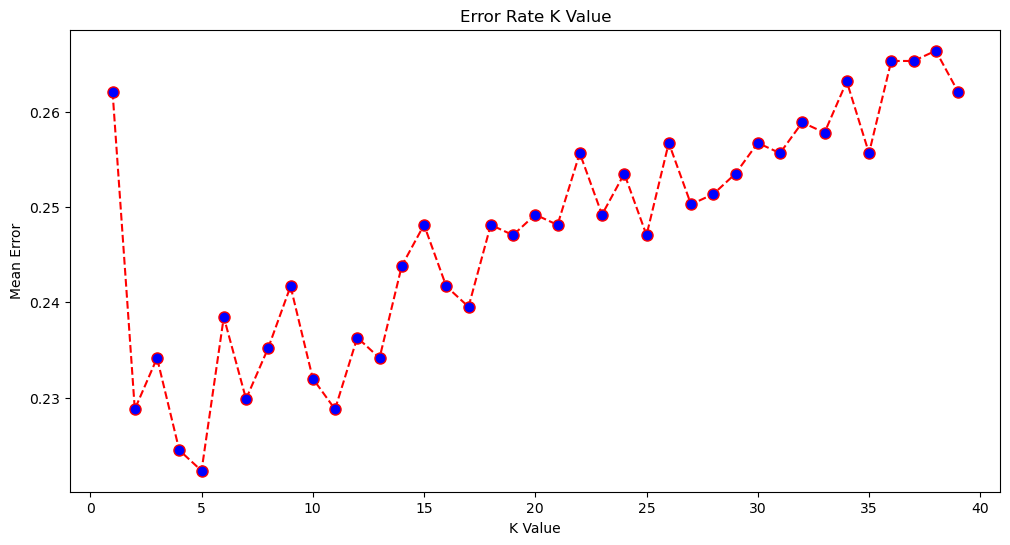

In [13]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=8)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,random_state=31)

# Алгоритм логистическая регресия 

In [15]:
logreg=LogisticRegression()

In [16]:
logreg.fit(X_train, y_train)

LogisticRegression()

In [17]:
y_pred = logreg.predict(X_test)

In [18]:
LogRegAccur = metrics.accuracy_score(y_test,y_pred)

In [19]:

cnf_matrix = confusion_matrix (y_test, y_pred)

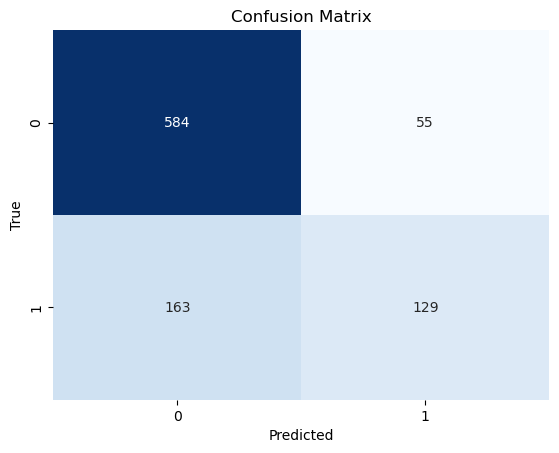

In [20]:
sns.heatmap(cnf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)

plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Находим AUC ROC

In [21]:
metrics.roc_auc_score(y_test, y_pred)

0.677854417218685

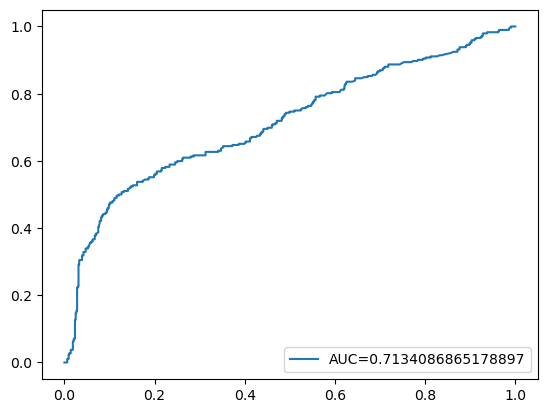

In [22]:
#plot ROC curve
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.legend(loc=4)
plt.show()

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,random_state=250)

# Dcision Tree Алгоритм 

In [24]:
from sklearn.tree import DecisionTreeClassifier
model_tree = DecisionTreeClassifier(max_depth=1)
model_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=1)

In [25]:
y_pred = model_tree.predict(X_test)

In [26]:
print (accuracy_score(y_test,y_pred))

0.7465091299677766


# Random Forest

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,random_state=31)

In [28]:
forest =  RandomForestClassifier()

forest.fit(X_train, y_train)
y_predict = forest.predict(X_test)
forestacc = accuracy_score(y_test,y_predict)
print("Forest Accuracy: %.3f"% forestacc)

Forest Accuracy: 0.842


# Ada boost

In [29]:
# Load libraries
from sklearn.ensemble import AdaBoostClassifier
from sklearn import datasets
# Import train_test_split function
from sklearn.model_selection import train_test_split
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=30) # 80% training and 30% test

In [31]:
## Create adaboost classifer object
abc = AdaBoostClassifier(n_estimators=2,
                         learning_rate=0.1)
# Train Adaboost Classifer
model = abc.fit(X_train, y_train)

#Predict the response for test dataset
y_pred_ada = model.predict(X_test)

In [32]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_ada))

Accuracy: 0.715359828141783


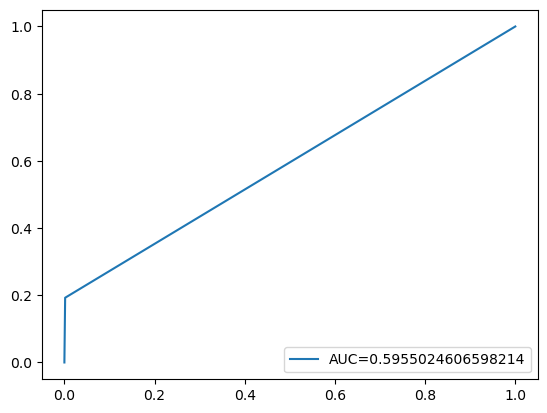

In [33]:
y_pred_ada_proba = model.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_ada_proba)
auc = metrics.roc_auc_score(y_test, y_pred_ada_proba)
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.legend(loc=4)
plt.show()

# # XG Boost

In [34]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error

In [35]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=30)

In [36]:
xgbc = xgb.XGBClassifier(objective ='binary:logistic', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 6, alpha = 2, n_estimators = 100)

In [37]:
xgbc.fit(X_train,y_train)



XGBClassifier(alpha=2, base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.3, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, ...)

In [38]:
y_pred_xgbc = xgbc.predict(X_test)

In [39]:
metrics.roc_auc_score(y_test, y_pred_xgbc)

0.792633716102639

#    # Cat boost

In [40]:
from catboost import CatBoostClassifier


In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=30)

In [42]:
model_ada = CatBoostClassifier(iterations=100, learning_rate=0.1, depth=4)


In [43]:
model_ada.fit(X_train,y_train)

0:	learn: 0.6573056	total: 162ms	remaining: 16s
1:	learn: 0.6258144	total: 164ms	remaining: 8.03s
2:	learn: 0.5944940	total: 166ms	remaining: 5.37s
3:	learn: 0.5684100	total: 168ms	remaining: 4.04s
4:	learn: 0.5516991	total: 171ms	remaining: 3.24s
5:	learn: 0.5374700	total: 173ms	remaining: 2.71s
6:	learn: 0.5186318	total: 175ms	remaining: 2.32s
7:	learn: 0.5047582	total: 177ms	remaining: 2.04s
8:	learn: 0.4939507	total: 179ms	remaining: 1.81s
9:	learn: 0.4845460	total: 182ms	remaining: 1.63s
10:	learn: 0.4727014	total: 184ms	remaining: 1.49s
11:	learn: 0.4626348	total: 186ms	remaining: 1.36s
12:	learn: 0.4571208	total: 188ms	remaining: 1.26s
13:	learn: 0.4492070	total: 190ms	remaining: 1.17s
14:	learn: 0.4446306	total: 192ms	remaining: 1.09s
15:	learn: 0.4416384	total: 195ms	remaining: 1.02s
16:	learn: 0.4382980	total: 197ms	remaining: 963ms
17:	learn: 0.4344006	total: 200ms	remaining: 909ms
18:	learn: 0.4294124	total: 202ms	remaining: 861ms
19:	learn: 0.4260972	total: 204ms	remaining

In [44]:
y_pred_cat=model_ada.predict(X_test)

In [45]:
metrics.roc_auc_score(y_test, y_pred_cat)

0.8188807541972982

In [46]:
import pickle

models = {
    "employee_KNN.pkl": knn,
    "employee_LogReg.pkl": logreg,
    "employee_DecisionTree.pkl": model_tree,
    "employee_RandomForest.pkl": forest,
    "employee_AdaBoost.pkl": abc,
    "employee_xgboos.pkl": xgbc,
    "employee_catboost.pkl": model_ada,

}

for filename, model in models.items():
    with open(filename, "wb") as pickle_out:
        pickle.dump(model, pickle_out)

In [47]:
data

,JoiningYear,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot,Bachelors,Masters,PHD,Bangalore,New Delhi,Pune
0,2017,3,34,1,0,0,0,1,0,0,1,0,0
1,2013,1,28,0,0,3,1,1,0,0,0,0,1
2,2014,3,38,0,0,2,0,1,0,0,0,1,0
3,2016,3,27,1,0,5,1,0,1,0,1,0,0
4,2017,3,24,1,1,2,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4648,2013,3,26,0,0,4,0,1,0,0,1,0,0
4649,2013,2,37,1,0,2,1,0,1,0,0,0,1
4650,2018,3,27,1,0,5,1,0,1,0,0,1,0
4651,2012,3,30,1,1,2,0,1,0,0,1,0,0


In [48]:
data = data.rename(columns={'New Delhi': 'New_Delhi'})

In [49]:
data

,JoiningYear,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot,Bachelors,Masters,PHD,Bangalore,New_Delhi,Pune
0,2017,3,34,1,0,0,0,1,0,0,1,0,0
1,2013,1,28,0,0,3,1,1,0,0,0,0,1
2,2014,3,38,0,0,2,0,1,0,0,0,1,0
3,2016,3,27,1,0,5,1,0,1,0,1,0,0
4,2017,3,24,1,1,2,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4648,2013,3,26,0,0,4,0,1,0,0,1,0,0
4649,2013,2,37,1,0,2,1,0,1,0,0,0,1
4650,2018,3,27,1,0,5,1,0,1,0,0,1,0
4651,2012,3,30,1,1,2,0,1,0,0,1,0,0
